In [3]:
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
X, Y = make_multilabel_classification(
   n_samples=12, n_classes=3, random_state=0
)
X_train, X_test, Y_train, Y_test = train_test_split(
   X, Y, random_state=0
)
base_lr = LogisticRegression(solver='lbfgs', random_state=0)
chain = ClassifierChain(base_lr, order='random', random_state=0)
chain.fit(X_train, Y_train).predict(X_test)
chain.predict_proba(X_test)

array([[0.83873122, 0.94314231, 0.4576149 ],
       [0.88781656, 0.3684047 , 0.26409868],
       [0.03213614, 0.99359669, 0.06257921]])

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain

In [3]:
# Load a multi-label dataset from https://www.openml.org/d/40597
X, Y = fetch_openml("yeast", version=4, return_X_y=True, parser="pandas")
Y = Y == "TRUE"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [4]:
# Fit an independent logistic regression model for each class using the
# OneVsRestClassifier wrapper.
base_lr = LogisticRegression()
ovr = OneVsRestClassifier(base_lr)
ovr.fit(X_train, Y_train)
Y_pred_ovr = ovr.predict(X_test)
ovr_jaccard_score = jaccard_score(Y_test, Y_pred_ovr, average="samples")

In [7]:
# Fit an ensemble of logistic regression classifier chains and take the
# take the average prediction of all the chains.
chains = [ClassifierChain(base_lr, order="random", random_state=i) for i in range(10)]
for chain in chains:
    chain.fit(X_train, Y_train)

Y_pred_chains = np.array([chain.predict(X_test) for chain in chains])
chain_jaccard_scores = [
    jaccard_score(Y_test, Y_pred_chain >= 0.5, average="samples")
    for Y_pred_chain in Y_pred_chains
]

Y_pred_ensemble = Y_pred_chains.mean(axis=0)
ensemble_jaccard_score = jaccard_score(
    Y_test, Y_pred_ensemble >= 0.5, average="samples"
)

model_scores = [ovr_jaccard_score] + chain_jaccard_scores
model_scores.append(ensemble_jaccard_score)

model_names = (
    "Independent",
    "Chain 1",
    "Chain 2",
    "Chain 3",
    "Chain 4",
    "Chain 5",
    "Chain 6",
    "Chain 7",
    "Chain 8",
    "Chain 9",
    "Chain 10",
    "Ensemble",
)

x_pos = np.arange(len(model_names))


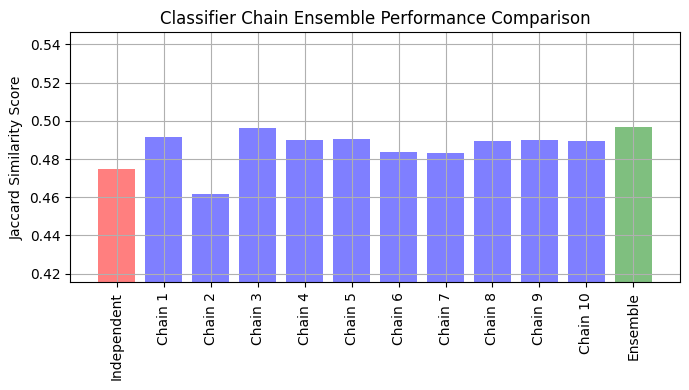

In [6]:
# Plot the Jaccard similarity scores for the independent model, each of the
# chains, and the ensemble (note that the vertical axis on this plot does
# not begin at 0).

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title("Classifier Chain Ensemble Performance Comparison")
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation="vertical")
ax.set_ylabel("Jaccard Similarity Score")
ax.set_ylim([min(model_scores) * 0.9, max(model_scores) * 1.1])
colors = ["r"] + ["b"] * len(chain_jaccard_scores) + ["g"]
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

***************************

In [1]:
import scipy
import numpy as np

In [2]:
data=scipy.io.loadmat('DBPB.mat')#读入由matlab处理好的样本特征向量
data_test=scipy.io.loadmat('DBPB_test.mat')

In [3]:
data['DBPB1'][0].shape#每个样本94个特征

(94,)

In [4]:
data['DBPB1'].shape#第一类样本数量为9279

(9279, 94)

### 先将数据读入到矩阵中便于处理

In [5]:
data['DBPB1']

array([[0.00172604, 0.00379138, 0.00296589, ..., 0.00116799, 0.00091695,
        0.00525093],
       [0.00352267, 0.00097731, 0.00296935, ..., 0.00847652, 0.00462204,
        0.00282324],
       [0.00339284, 0.00166496, 0.00277194, ..., 0.00288942, 0.00499452,
        0.00355836],
       ...,
       [0.00799746, 0.00392692, 0.00227704, ..., 0.00519247, 0.00426208,
        0.00183095],
       [0.00149238, 0.00276466, 0.00239477, ..., 0.00100603, 0.00415174,
        0.00158   ],
       [0.00478357, 0.00589117, 0.006869  , ..., 0.00381122, 0.01051007,
        0.01011765]])

In [6]:
d_1=np.array(data['DBPB1'])
d_2=np.array(data['DBPB2'])
d_3=np.array(data['DBPB3'])
d_4=np.array(data['DBPB4'])
d_5=np.array(data['DBPB5'])
d_6=np.array(data['DBPB6'])
d_7=np.array(data['DBPB7'])
d_8=np.array(data['DBPB8'])
d_9=np.array(data['DBPB9'])
d_10=np.array(data['DBPB10'])
d_11=np.array(data['DBPB11'])

dt_1=np.array(data_test['DBPB1'])
dt_2=np.array(data_test['DBPB2'])
dt_3=np.array(data_test['DBPB3'])
dt_4=np.array(data_test['DBPB4'])
dt_5=np.array(data_test['DBPB5'])
dt_6=np.array(data_test['DBPB6'])
dt_7=np.array(data_test['DBPB7'])
dt_8=np.array(data_test['DBPB8'])
dt_9=np.array(data_test['DBPB9'])
dt_10=np.array(data_test['DBPB10'])
dt_11=np.array(data_test['DBPB11'])


### 接下来进行数据平衡

#### 整合数据

In [7]:
X_train=np.concatenate((d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11),axis=0)
X_test=np.concatenate((dt_1,dt_2,dt_3,dt_4,dt_5,dt_6,dt_7,dt_8,dt_9,dt_10,dt_11),axis=0)
print(X_train.shape)
print(X_test.shape)

(12983, 94)
(5662, 94)


In [8]:
for i in range(1,12):
    exec(f'y_{i}=np.full(d_{i}.shape[0],i)');
    exec(f'yt_{i}=np.full(dt_{i}.shape[0],i)')
y_dir=[y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11]
yt_dir=[yt_1,yt_2,yt_3,yt_4,yt_5,yt_6,yt_7,yt_8,yt_9,yt_10,yt_11]
y=np.concatenate((y_dir),axis=0)
yt=np.concatenate((yt_dir),axis=0)
print(y.shape)
print(yt.shape)

(12983,)
(5662,)


In [9]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import OneSidedSelection
from imblearn.pipeline import Pipeline

In [10]:
y_resampled=y
Y_train=np.zeros((y_resampled.shape[0],4))
Y_test=np.zeros((yt.shape[0],4))
for i in range(y_resampled.shape[0]):
    if y_resampled[i]==1:
        Y_train[i]=np.array([1,0,0,0])#a
    elif y_resampled[i]==2:
        Y_train[i]=np.array([0,1,0,0])#c
    elif y_resampled[i]==3:
        Y_train[i]=np.array([0,0,1,0])#m
    elif y_resampled[i]==4:
        Y_train[i]=np.array([0,0,0,1])#s
    elif y_resampled[i]==5:
        Y_train[i]=np.array([1,1,0,0])#ac
    elif y_resampled[i]==6:
        Y_train[i]=np.array([1,0,1,0])#am
    elif y_resampled[i]==7:
        Y_train[i]=np.array([1,0,0,1])#as
    elif y_resampled[i]==8:
        Y_train[i]=np.array([0,1,1,0])#cm
    elif y_resampled[i]==9:
        Y_train[i]=np.array([1,1,1,0])#acm
    elif y_resampled[i]==10:
        Y_train[i]=np.array([1,1,0,1])#acs
    elif y_resampled[i]==11:
        Y_train[i]=np.array([1,1,1,1])#acms

for i in range(yt.shape[0]):
    if yt[i]==1:
        Y_test[i]=np.array([1,0,0,0])#a
    elif yt[i]==2:
        Y_test[i]=np.array([0,1,0,0])#c
    elif yt[i]==3:
        Y_test[i]=np.array([0,0,1,0])#m
    elif yt[i]==4:
        Y_test[i]=np.array([0,0,0,1])#s
    elif yt[i]==5:
        Y_test[i]=np.array([1,1,0,0])#ac
    elif yt[i]==6:
        Y_test[i]=np.array([1,0,1,0])#am
    elif yt[i]==7:
        Y_test[i]=np.array([1,0,0,1])#as
    elif yt[i]==8:
        Y_test[i]=np.array([0,1,1,0])#cm
    elif yt[i]==9:
        Y_test[i]=np.array([1,1,1,0])#acm
    elif yt[i]==10:
        Y_test[i]=np.array([1,1,0,1])#acs
    elif yt[i]==11:
        Y_test[i]=np.array([1,1,1,1])#acms

In [17]:
sum(Y_train[:,0]==1)

11131

In [63]:
def get_knn(x,X_train,k,sign):
    diffMat=np.tile(x,(X_train.shape[0],1))-X_train
    distance=((diffMat**2).sum(axis=1))**0.5
    if sign==1:
        ans=distance.argsort[0:k]
    else:
        ans=distance.argsort()[1:k+1]
    return ans

In [94]:
#mlknn
def mlknn_train(X_train,Y_train,k):
    s=1
    #计算训练样本是第i类的概率
    p_1=np.zeros(4)
    p_0=np.zeros(4)
    for i in range(0,4):
        p_1[i]=(s+sum(Y_train[:,i]==1))/(s*2+Y_train.shape[0])
        p_0[i]=1-p_1[i]
    print(f"p_1:{p_1}")
    #计算某样本是第i类的条件下，它的K近邻中有几个是第i类的条件概率
    #c_1记录每个样本的K近邻中有count个属于这一类的情况下该样本也属于这一类的个数
    c_1=np.zeros((4,k+1))
    c_0=np.zeros((4,k+1))
    #p_1_n记录样本属于第i类的情况下，其K近邻中有几个是第i类的条件概率
    p_1_n=np.zeros((4,k+1))
    p_0_n=np.zeros((4,k+1))
    N_x=np.zeros((X_train.shape[0],k,4))
    for j in range(0,X_train.shape[0]):
        N_x[j]=Y_train[get_knn(X_train[j],X_train,k,0)] #获得每个训练样本x的K近邻样本的标签
    for i in range(0,4):
        print(f"start type {i+1}")
        for j in range(0,Y_train.shape[0]):
            count=sum(N_x[j][:,i]==1)              #统计第j个训练样本的K近邻样本中属于第i类的数量
            if(Y_train[j][i]==1):
                c_1[i][count]+=1
            else:
                c_0[i][count]+=1
        #求出样本是第i类的条件下，K近邻中有j个是第i类的条件概率
        #求出样本不是第i类的条件下，K近邻中有j个是第i类的条件概率
        for j in range(0,k+1):
            p_1_n[i][j]=(s+c_1[i][j])/(s*(k+1)+sum(c_1[i]))
            p_0_n[i][j]=(s+c_0[i][j])/(s*(k+1)+sum(c_0[i]))
        print(f"finish type {i+1}")
    return p_1,p_0,p_1_n,p_0_n

In [95]:
p_1,p_0,p_1_n,p_0_n=mlknn_train(X_train,Y_train,5)

p_1:[0.85729688 0.15710435 0.08979592 0.10335002]
start type 1
finish type 1
start type 2
finish type 2
start type 3
finish type 3
start type 4
finish type 4


In [105]:
def mlknn_predecit(X,X_train,Y_trian,k,p_1,p_0,p_1_n,p_0_n):
    #获取待预测样本的K近邻样本的标签
    N_x=np.zeros((X.shape[0],k,4))
    Y_pre=np.zeros((X.shape[0],4))
    for j in range(0,X.shape[0]):
        N_x[j]=Y_train[get_knn(X[j],X_train,k,0)]
    for i in range(0,4):
        for j in range(0,X.shape[0]):
            count=sum(N_x[j][:,i]==1)              #统计第j个训练样本的K近邻样本中属于第i类的数量
            Y_pre[j][i]=(p_1[i]*p_1_n[i][count]>p_0[i]*p_0_n[i][count])
    return Y_pre

In [107]:
pre=mlknn_predecit(X_train,X_train,Y_train,5,p_1,p_0,p_1_n,p_0_n)

In [145]:
acc_c=0
for i in range(0,pre.shape[0]):
    if((pre[i]==Y_train[i]).all()):
        acc_c+=1

In [146]:
acc_c

9279

In [149]:
acc=acc_c/X_train.shape[0]

In [150]:
acc

0.7147038434876377